In [1]:
import numpy as np
import pandas as pd
from pyei.r_by_c import RowByColumnEI
from pyei.data import get_data

# Demo of RxC models and plotting using Santa Clara data

We show examples of using and examining models available in pyei using a sample data set:

In [2]:
data = get_data("santaClara.csv")

precinct_pops = np.array(data['total2'])
votes_fractions = np.array(data[['pct_for_hardy2', 'pct_for_kolstad2', 'pct_for_nadeem2']]).T
candidate_names = ["Hardy", "Kolstad", "Nadeem"]
group_fractions = np.array(data[['pct_ind_vote', 'pct_e_asian_vote', 'pct_non_asian_vote']]).T
demographic_group_names = ["ind", "e_asian", "non_asian"]


In [3]:
ei = RowByColumnEI(model_name='multinomial-dirichlet-modified')

In [4]:
ei.fit(group_fractions, votes_fractions, precinct_pops, demographic_group_names, candidate_names)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, phi, kappa]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 244 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


## Plotting

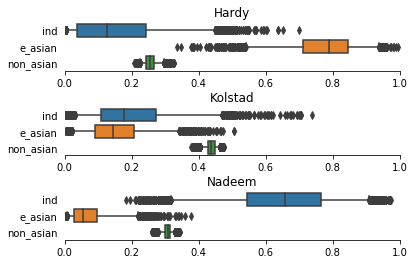

In [5]:
ei.plot_boxplots()

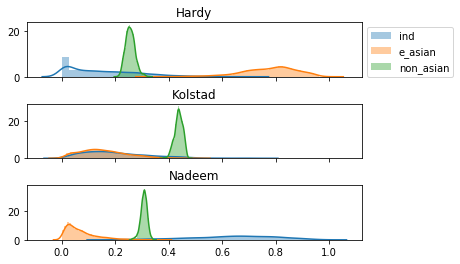

In [6]:
ei.plot_kdes(plot_by="candidate")

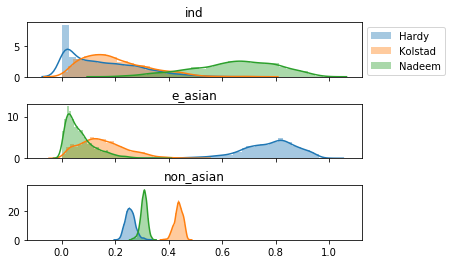

In [7]:
ei.plot_kdes(plot_by="group")

## Summaries
Text summaries and summary statistics

In [8]:
print(ei.summary())


            Computed from the raw b_ samples by multiplying by population and then 
            getting the proportion of the total pop 
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.153
                Credible interval:  [0.00326416 0.4491352 ]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.200
                Credible interval:  [0.03161278 0.46965169]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.647
                Credible interval:  [0.3174027  0.90803137]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.776
                Credible interval:  [0.54111844 0.93851218]
                The posterior 

In [9]:
print(ei.candidate_of_choice())

ind
In 0.0375 of samples, the district-level vote preference of
                    ind for Hardy
                    was higher than for any other candidate
In 0.0505 of samples, the district-level vote preference of
                    ind for Kolstad
                    was higher than for any other candidate
In 0.912 of samples, the district-level vote preference of
                    ind for Nadeem
                    was higher than for any other candidate
e_asian
In 0.998 of samples, the district-level vote preference of
                    e_asian for Hardy
                    was higher than for any other candidate
In 0.00175 of samples, the district-level vote preference of
                    e_asian for Kolstad
                    was higher than for any other candidate
In 0.00025 of samples, the district-level vote preference of
                    e_asian for Nadeem
                    was higher than for any other candidate
non_asian
In 0.0 of samples, the district-leve

Posterior means of voting preference for each group/candidate:

In [10]:
posterior_mean_voting_prefs = ei.posterior_mean_voting_prefs
df = pd.DataFrame(posterior_mean_voting_prefs, columns=candidate_names, index=demographic_group_names)
df.head()

,Hardy,Kolstad,Nadeem
ind,0.153085,0.200010,0.646905
e_asian,0.775952,0.154557,0.069492
non_asian,0.255952,0.437040,0.307009


95% Credible interval for voting preferences for each group:

In [11]:
num_groups, num_candidates = ei.num_groups_and_num_candidates # R, C
credible_interval_95_mean_voting_prefs = ei.credible_interval_95_mean_voting_prefs
for r in range(num_groups):
    for c in range(num_candidates):
        print(demographic_group_names[r],candidate_names[c], credible_interval_95_mean_voting_prefs[r][c])

ind Hardy [0.00326416 0.4491352 ]
ind Kolstad [0.03161278 0.46965169]
ind Nadeem [0.3174027  0.90803137]
e_asian Hardy [0.54111844 0.93851218]
e_asian Kolstad [0.02164774 0.34158382]
e_asian Nadeem [0.00592951 0.21784817]
non_asian Hardy [0.22429696 0.29511043]
non_asian Kolstad [0.40426019 0.46376128]
non_asian Nadeem [0.27887098 0.32925861]


## Samples

Samples from the posterior are accessible. 

Precinct level samples are aggregated into district level preference samples by weighting each precinct by its population:

In [12]:
ei.sampled_voting_prefs.shape # ei.sampled_voting_prefs is samples of district-level voter preference: num_samples x r x c

(4000, 3, 3)

Samples can also be obtained directly by the parameter name in the model:

In [13]:
ei.sim_trace["b"].shape # ei.sim_trace["b"] is samples of precinct-level voter preference: num_samples x num_precincts x r x c

(4000, 42, 3, 3)

In [14]:
ei.sim_trace["kappa"].mean()

67.87744743688148